In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

import random

In [22]:
X, _ = make_blobs(centers=3, random_state=42)

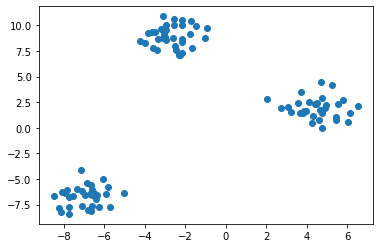

In [23]:
plt.scatter(X[:, 0], X[:, 1])

In [27]:
class Cluster:
    
    def __init__(self, center, name):
        self.center = center
        self.name = name
        self.points= []
        
    def distance(self, point):
        return np.sqrt(np.sum((self.center - point) ** 2))
    
    def relocate(self):
        self.center = np.mean(self.points, axis=0)
        self.points.clear()

class KMeansCustom:
    
    def __init__(self, n_clusters=5, max_iters=20, n_init = 10):
        self.max_iters = max_iters
        self.n_clusters = n_clusters
        self.n_init = n_init
        
    def fit(self, X):
        
        solutions = []
        
        for init in range(self.n_init):
        
            clusters = []
            for i in range(self.n_clusters):
                cluster = Cluster(center=random.choice(X), name=i)
                clusters.append(cluster)

            errors = []

            for it in range(self.max_iters):

                # voting
                labels = []

                for point in X:

                    # collect distance of point to all clusters
                    distances = []
                    for cluster in clusters:
                        distance = cluster.distance(point)
                        distances.append((distance, cluster.name))

                    # sort and select cluster with min distance 
                    distance, cluster_name = sorted(distances)[0]

                    # customer voted who
                    labels.append(cluster_name)

                    # who voted me
                    cluster = clusters[cluster_name]
                    cluster.points.append(point)

                err = self.error(labels, clusters, X)
                errors.append(err)

                for cluster in clusters:
                    cluster.relocate()
            
            solutions.append([errors[-1], labels, clusters])
            
        
        sorted_sols = sorted(solutions, key= lambda item:item[0])
        err, labels, clusters = sorted_sols[0]
        
        self.labels_ = np.array(labels)
        self.cluster_centers_ = np.array([cluster.center for cluster in clusters])
        
    
    def error(self, labels, clusters, X):
        
        err = 0
        
        for point, label in zip(X, labels):
            cluster = clusters[label]
            err += cluster.distance(point)
        
        return err / len(X)
            
        

/Users/anuj/anaconda3/envs/mod/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/anuj/anaconda3/envs/mod/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


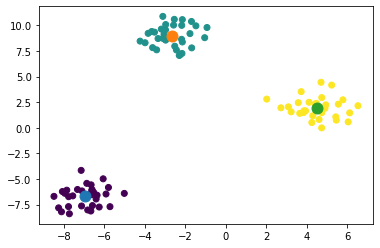

In [28]:
model = KMeansCustom(3)
model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1], s=120)

In [29]:
model.labels_

array([0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1,
       1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1])

In [30]:
model.cluster_centers_

array([[-6.95170962, -6.67621669],
       [-2.66780392,  8.93576069],
       [ 4.49951001,  1.93892013]])